In [1]:
import BioSimSpace as BSS

/home/ubuntu/.conda/envs/openbiosim/lib/python3.12/site-packages/nglview/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
INFO:rdkit:Enabling RDKit 2024.03.3 jupyter extensions
INFO:numexpr.utils:Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.


## Holo: AM-7209 Open V14G - FF99SB Example

In [2]:
# Load the input protein files
mdm2_wt = BSS.IO.readMolecules("raw_proteins/FF99SB-ILDN_OPC/wt/wt_am_open.amber.pdb")[0]
mdm2_mut = BSS.IO.readMolecules("raw_proteins/FF99SB-ILDN_OPC/v14g/v14g_am_open.amber.pdb")[0]

In [3]:
# Load the ligand
am_7209 = BSS.IO.readMolecules(["raw_ligands/am_ligand.gro", "raw_ligands/am_ligand.top"])[0]

In [4]:
# Parametrise the protein
mdm2_wt = BSS.Parameters.ff99SBildn(mdm2_wt, work_dir="/tmp", ensure_compatible=False).getMolecule()
mdm2_mut = BSS.Parameters.ff99SBildn(mdm2_mut, work_dir="/tmp", ensure_compatible=False).getMolecule()

/home/ubuntu/.conda/envs/openbiosim/lib/python3.12/site-packages/BioSimSpace/Parameters/_process.py:142: UserWarning: Attempting to parameterise a molecule without hydrogen atoms!
  _warnings.warn(


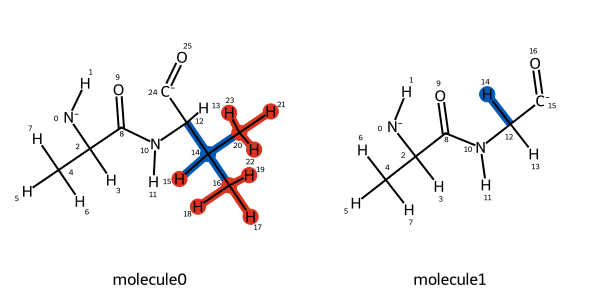

In [5]:
# Perform MCS alignment between wild-type and mutant protein and visualise the mapped atoms

mapping = BSS.Align.matchAtoms(molecule0=mdm2_wt, molecule1=mdm2_mut, roi=[9])

BSS.Align.viewMapping(mdm2_wt, mdm2_mut, mapping, roi=9)

In [6]:
aligned_mol_a = BSS.Align.rmsdAlign(molecule0=mdm2_wt, molecule1=mdm2_mut, roi=[9])
merged_mol = BSS.Align.merge(molecule0=aligned_mol_a, molecule1=mdm2_mut, mapping=mapping, roi=[9])

In [7]:
# add ligand to the merged system, solvation of this system will be done during post-processing
merged_system = merged_mol + am_7209

In [8]:
# Save the perturbable protein and ligand system
BSS.IO.saveMolecules(f"output_systems/FF99SB-ILDN_OPC/v14g/mdm2_am_open_v14g", merged_system, ["gro87", "grotop"])

['/home/ubuntu/mdm2/01_prepare_inputs/output_systems/FF99SB-ILDN_OPC/v14g/mdm2_am_open_v14g.gro',
 '/home/ubuntu/mdm2/01_prepare_inputs/output_systems/FF99SB-ILDN_OPC/v14g/mdm2_am_open_v14g.top']

## Apo: Closed T16G I19G - FF14SB Example

In [9]:
mdm2_wt = BSS.IO.readMolecules("raw_proteins/FF14SB_TIP3P/wt/wt_apo_closed.amber.pdb")[0]
mdm2_mut = BSS.IO.readMolecules("raw_proteins/FF14SB_TIP3P/t16g_i19g/t16g_i19g_apo_closed.amber.pdb")[0]

In [10]:
mdm2_wt = BSS.Parameters.ff14SB(mdm2_wt, work_dir="/tmp", ensure_compatible=False).getMolecule()
mdm2_mut = BSS.Parameters.ff14SB(mdm2_mut, work_dir="/tmp", ensure_compatible=False).getMolecule()

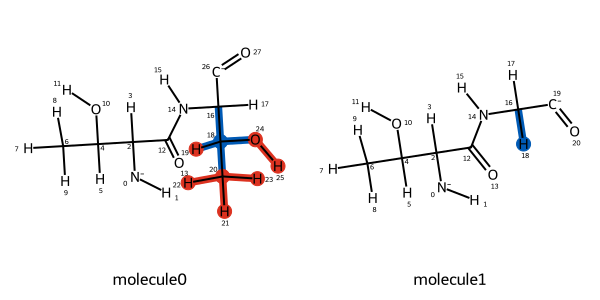

In [11]:
mapping = BSS.Align.matchAtoms(molecule0=mdm2_wt, molecule1=mdm2_mut, roi=[11, 14])

BSS.Align.viewMapping(mdm2_wt, mdm2_mut, mapping, roi=11)

In [12]:
aligned_mol_a = BSS.Align.rmsdAlign(molecule0=mdm2_wt, molecule1=mdm2_mut, roi=[11, 14])
merged_mol = BSS.Align.merge(molecule0=aligned_mol_a, molecule1=mdm2_mut, mapping=mapping, roi=[11, 14])

In [14]:
# Solvate the merged system
merged_system = merged_mol.toSystem()
box_size = 7.5 # nanometers
box, angles = BSS.Box.rhombicDodecahedronHexagon(box_size * BSS.Units.Length.nanometer)
solvated_system = BSS.Solvent.tip3p(molecule=merged_system, box=box, angles=angles, ion_conc=0.15, work_dir="/tmp")

In [15]:
# Save the perturbable protein and ligand system
BSS.IO.saveMolecules(f"output_systems/FF14SB-TIP3P/t16g_i19g/mdm2_apo_closed_t16g_i19g", solvated_system, ["gro87", "grotop"])

['/home/ubuntu/mdm2/01_prepare_inputs/output_systems/FF14SB-TIP3P/t16g_i19g/mdm2_apo_closed_t16g_i19g.gro',
 '/home/ubuntu/mdm2/01_prepare_inputs/output_systems/FF14SB-TIP3P/t16g_i19g/mdm2_apo_closed_t16g_i19g.top']